# Delay and Sum -Ultrasound 
first we try to calculate the the out put the configuration of mics would have produced and try to find the the input cordinaters for these points useing the out of the mics

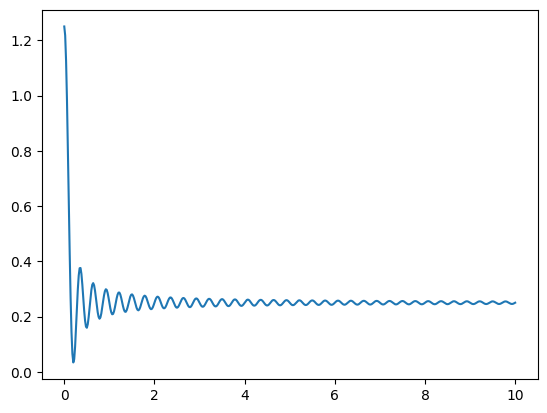

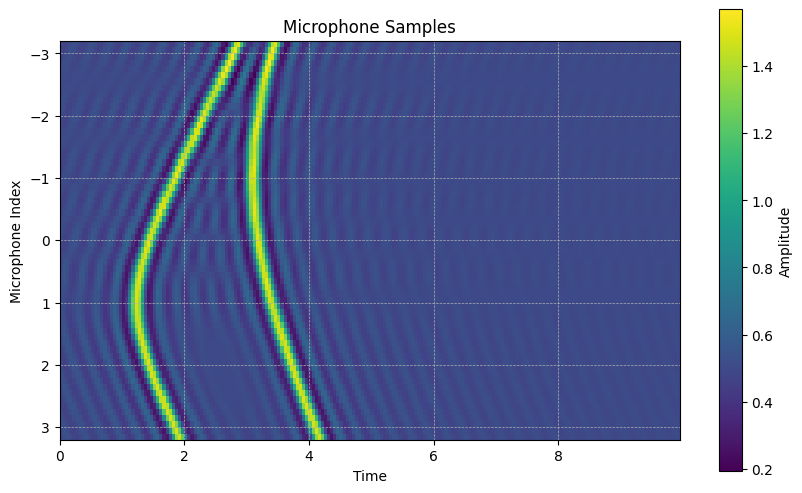

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Nmics = 64
Nsamp = 200
src = (0, 0)
pitch = 0.1
dist_per_samp = 0.1
C = 0.5 #speed
SincP = 7.0
# Location of point obstacle
obstacle = (3, -1)

# Define the source waveform using a sinc function
def wsrc(t):
    return np.sinc(SincP * t)+0.25
plt.plot(np.linspace(0, 10, 500),wsrc(np.linspace(0, 10, 500)))
def dist(src, pt, mic):
    return np.sqrt((src[0] - pt[0]) ** 2 + (src[1] - pt[1]) ** 2) + np.sqrt((pt[0] - mic[0]) ** 2 + (pt[1] - mic[1]) ** 2)

# Function to generate samples for each microphone 
def generate_microphone_samples(Nmics, Nsamp, C, obstacle_locations):
    # Time axis with Nsamp time instants
    t = np.linspace(0, (Nsamp-1)*dist_per_samp/C, Nsamp)
    # Initialize an array to store the samples for each microphone
    mic_samples = np.zeros((Nmics, Nsamp))
    for obstacle_location in obstacle_locations:
        for mic_index in range(Nmics):
            #calcuate mic position 
            mic_position = (0,(mic_index - (Nmics - 1) / 2) * pitch)
            # Calculate the time delay for this microphone due to the obstacle
            distance_to_obstacle = dist(src, obstacle_location, mic_position)
            time_delay = distance_to_obstacle / C
            # Generate the received waveform for this microphone
            received_waveform = wsrc(t - time_delay)
            # Store the received waveform in the array
            mic_samples[mic_index] += received_waveform
    return mic_samples

# Parameters
Nmics = 64
Nsamp = 200
C = 2
obstacle_location = [(3,-1),(1,1)]

# Call the function to generate microphone samples
mic_samples = generate_microphone_samples(Nmics, Nsamp, C, obstacle_location)

# Plot the microphone samples
plt.figure(figsize=(10, 6))
plt.imshow(mic_samples, cmap='viridis',extent=[0, (Nsamp-1)*dist_per_samp/C, Nmics*pitch/2,-Nmics*pitch/2])

plt.title('Microphone Samples')
plt.xlabel('Time')
plt.ylabel('Microphone Index')
plt.colorbar(label='Amplitude')
plt.grid(True, linestyle='--', linewidth=0.5)




here we implement the delay and sum algorithem at first we go to every point and find the the approite the index corresponding in the mic_samples matrix as if the obstacle was there and add those index values in the points and try to plot them .

Text(0, 0.5, 'Microphones')

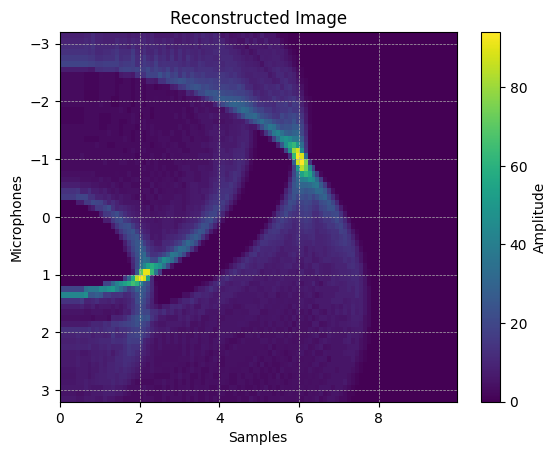

In [40]:
#mic_samples=np.loadtxt("rx3.txt")
def das():
    y_1 = np.arange(-((Nmics - 1) / 2) * pitch, ((Nmics - 1) / 2) * pitch + pitch, pitch)
    x_1 = np.arange(0, Nsamp * dist_per_samp/2+1, dist_per_samp/2)
    image = np.zeros((Nmics,int(Nsamp/2)+1))
    for x in range(Nsamp):
        for y in range(Nmics):
            y1 =y_1[y]
            x1 =x_1[x]
            for mic_index in range(Nmics):
                mic_position =(0,y_1[mic_index])
                # Calculate the time delay for this microphone due to the obstacle
                distance_to_obstacle = dist(src, (x1, y1), mic_position)
                index=int (distance_to_obstacle/dist_per_samp)
                # Ensure that the time_delay is within the valid range of time samples
                if 0 <= index < Nsamp-1:
                    if mic_samples[mic_index][index]>1.1:
                        image[y][x]+=mic_samples[mic_index][index]
    return image
img = das()

plt.imshow(img, extent=[0, (Nsamp-1)*dist_per_samp/2, Nmics*pitch/2,-Nmics*pitch/2], aspect='auto')
plt.title('Reconstructed Image')
plt.colorbar(label='Amplitude')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xlabel('Samples')
plt.ylabel('Microphones')
#plt.savefig("assign8_13.png")

                
                
            
            
            

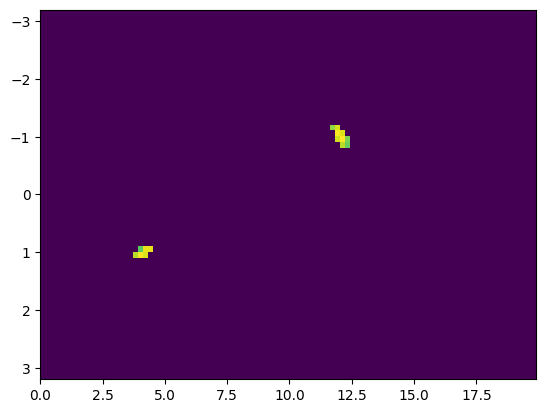

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming img is your image data
# Creating a mask where img values are more than 70
mask = img > 70

# Masking the image with the condition
masked_img = np.where(mask, img, 0)
plt.imshow(masked_img, extent=[0, (Nsamp - 1) * dist_per_samp, Nmics * pitch / 2, -Nmics * pitch / 2], aspect='auto')
plt.show()


### 1.Does itmake sense to reconstruct up toNsamp? What value is more reasonable as an upper limit for the x-axis here?
We can extend our analysis only up to half of the Nsamp, as attempting to go beyond that point will result in an inability to reconstruct the image. This limitation arises because the mic_sample matrix cannot capture information about objects located beyond this point. It aligns with the fact that the maximum delay pulse, necessary for capturing distant objects, would need to travel a distance twice as long, making it beyond the capacity of the mic_samples matrix to effectively capture and reconstruct the image.  

### 2The (x, y) coordinates corresponding to the maximum amplitude (yellowcolour) is approximately (30, 22). Explain why this is the correct expected position for the given obstacle.
### 3.What is the maximum obstacle x- and y- coordinate that you can use and still have an image reconstructed?
maximum x and y are for x nsamp*distance_per_Samp/2 and -nmics*pitch/2 <=y=>-nmics*pitch. so points 30,22 with respect to the array index can be plotted. and is correct as 30 * distance per samp is 3 and for 22 using the formula we as -1. so the points are apparently correct.
for x=30 * dist_per_samp
    y=(22 - (Nmics - 1) / 2) * pitch
``` python 
y_1 = np.arange(-((Nmics - 1) / 2) * pitch, ((Nmics - 1) / 2) * pitch + pitch, pitch)
    x_1 = np.arange(0, Nsamp * dist_per_samp, dist_per_samp)
```
### 4. What happens if C is different - if C is decreased it looks like the image becomes sharper. Can you explain why intuitively?
When C is decreased, it means that sound waves travel more slowly. In ultrasound imaging, the speed of sound is used to calculate the distances between the transducer and different points in the tissue. If C is reduced, the calculated distances will be smaller than they would be with a higher speed of sound. This can lead to a compression of the image along the depth direction.
In terms of image quality, a decreased speed of sound can make the image appear sharper in the depth direction. However, it's essential to note that this change in C affects the accuracy of distance calculations. Therefore, while it may enhance sharpness, it can also introduce distortions in terms of accurate spatial representation. Adjusting the speed of sound is a trade-off between image sharpness and accuracy in distance measurements.

### 5.What happens if Nmics is increased or decreased? Do the experiments with Nmics = [8, 32, 64] and Nsamp = [50, 100, 200] (all combinations). Attach the resulting images 
if nmics is increased then we can plot for a larger range of values of y .if the pitch is reduced and proportionally nmics are increased then the quality of the image increases.

The plots below show two example sinc pulses. How will you generate pulses that look
like this? Which parameter should be changed? What effect do you think this will have on the final
image?
to change the function we will have to change sinp the function used is 

``` python 
def wsrc(t):
    return np.sinc(SincP * t)
```
the pulse becomes sharp or the the pulce width reduces . we get a more sharper image 